#Phase1:

##Goal of Collecting Dataset:

The primary goal of analyzing this dataset is to:

Performance Analysis: Assess team and player performances by examining various metrics such as goals, assists, and other key statistics.

Outcome Prediction: Develop models to predict match outcomes or player performances based on historical data.

Trend Identification: Discover trends and patterns in match results, player statistics, and team strategies.

We will achieve this by clustering data and classifying it using machine learning techniques acquired during the course.

##Source of Dataset:
Kaggle Platform Dataset link: https://www.kaggle.com/datasets/evangower/fifa-world-cup

##General Information about the Dataset:

Number of Attributes:15

Number of Objects:900 (Match)

Class Name/Labels: outcome


In [13]:

import pandas as pd

df = pd.read_csv('Dataset/wcmatches.csv')

print(df.info())

num_row = len(df)
print("Number of rows:", num_row)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            900 non-null    int64 
 1   country         900 non-null    object
 2   city            900 non-null    object
 3   stage           900 non-null    object
 4   home_team       900 non-null    object
 5   away_team       900 non-null    object
 6   home_score      900 non-null    int64 
 7   away_score      900 non-null    int64 
 8   outcome         900 non-null    object
 9   win_conditions  62 non-null     object
 10  winning_team    731 non-null    object
 11  losing_team     731 non-null    object
 12  date            900 non-null    object
 13  month           900 non-null    object
 14  dayofweek       900 non-null    object
dtypes: int64(3), object(12)
memory usage: 105.6+ KB
None
Number of rows: 900


------------------------------------------------------

#Phase2:

| Attributes Name | Data type | Description | Possible Values |
|----------|----------|----------|----------|
|Year |	Integer| The year of the match |	Any year (e.g., 1930, 1934, etc.)|
|Country |	String |The country hosting the World Cup |  Categorical string values (different possible)|
|City	| String |	The city where the match took place	 | Categorical string values (different possible)|
|Stage	| String|	The stage of the tournament | Categorical string values (different possible)|
|Home Team |	String | The team playing at home |	Categorical string values (different possible)|
|Away Team |	String |	The team playing away |	Categorical string values (different possible)|
|Home Score |	Integer	| The score of the home team |	0-10|
|Away Score	| Integer |	The score of the away team |	0-8|
|Outcome |	String | The result of the match |	H (Home win), A (Away win), D (Draw)|
|Win Conditions |	String |	Conditions under which the winning team was determined	Specific phrases |Categorical string values (different possible)|
|Winning Team |	String | The team that won the match |	Categorical string values (different possible)|
|Losing Team|	String | The team that lost the match |	Categorical string values (different possible)|
|Date |Date |	The date of the match |	Datetime |
|Month |String	|The month in which the match took place|Categorical string values (different possible)|
|DayOfWeek |	String |	The day of the week when the match occurred | Categorical string values (different possible)|


##Sample

In [14]:

sample = df.sample(frac=1)
print(sample);

     year        country              city          stage    home_team  \
84   1954    Switzerland          Lausanne        Group 1       Brazil   
37   1938         France          Toulouse    Round of 16         Cuba   
592  2002          Japan           Saitama        Group H        Japan   
194  1966        England        Sunderland  Quarterfinals      Hungary   
374  1986         Mexico       Mexico City        Group A  South Korea   
..    ...            ...               ...            ...          ...   
859  2018         Russia  Saint Petersburg        Group E       Brazil   
1    1930        Uruguay        Montevideo        Group 4      Belgium   
899  2018         Russia            Moscow          Final       France   
450  1990          Italy             Turin    Round of 16       Brazil   
469  1994  United States           Orlando        Group F      Belgium   

         away_team  home_score  away_score outcome win_conditions  \
84      Yugoslavia           1           1

##Show the missing value:

In [15]:
missing_values = df.isnull().sum()
print("Missing values ")
print(missing_values )
missing_counts = missing_values.sum();
print("The total of Missing value is :")
print(missing_counts)

Missing values 
year                0
country             0
city                0
stage               0
home_team           0
away_team           0
home_score          0
away_score          0
outcome             0
win_conditions    838
winning_team      169
losing_team       169
date                0
month               0
dayofweek           0
dtype: int64
The total of Missing value is :
1176


##Show the Min., 1st Qu., Median, Mean ,3rd Qu.,Max. for each numeric column:

In [16]:
summary_stats=df.describe();
print(summary_stats);

              year  home_score  away_score
count   900.000000  900.000000  900.000000
mean   1986.915556    1.568889    1.262222
std      23.150270    1.489574    1.313960
min    1930.000000    0.000000    0.000000
25%    1970.000000    0.000000    0.000000
50%    1990.000000    1.000000    1.000000
75%    2006.000000    2.000000    2.000000
max    2018.000000   10.000000    8.000000


##Show the Variance:

In [17]:
variance= df.var(numeric_only=True);
print(variance);

year          535.935019
home_score      2.218831
away_score      1.726491
dtype: float64


##Data Preprocessing:

###Data Cleaning:

###1-Remove duplicates:

####First, we count the number of duplicates rows, and then we remove them:

In [18]:
import pandas as pd
data = pd.read_csv('Dataset/wcmatches.csv')
num_duplicates = data.duplicated().sum()
data_cleaned = data.drop_duplicates()
print("Number of duplicate rows:", num_duplicates)
print("DataFrame after dropping all duplicate rows:")
print(data_cleaned)
data_cleaned.to_csv('Cleaned_dataset.csv', index=False)

Number of duplicate rows: 0
DataFrame after dropping all duplicate rows:
     year  country              city          stage  home_team      away_team  \
0    1930  Uruguay        Montevideo        Group 1     France         Mexico   
1    1930  Uruguay        Montevideo        Group 4    Belgium  United States   
2    1930  Uruguay        Montevideo        Group 2     Brazil     Yugoslavia   
3    1930  Uruguay        Montevideo        Group 3       Peru        Romania   
4    1930  Uruguay        Montevideo        Group 1  Argentina         France   
..    ...      ...               ...            ...        ...            ...   
895  2018   Russia             Sochi  Quarterfinals     Russia        Croatia   
896  2018   Russia  Saint Petersburg     Semifinals     France        Belgium   
897  2018   Russia            Moscow     Semifinals    Croatia        England   
898  2018   Russia  Saint Petersburg    Third place    Belgium        England   
899  2018   Russia            Moscow

This shows that our dataset has no duplicate rows, so the total number of rows remains unchanged at 900.

###2-Handling Missing Values: 

####First, we calculate the number of missing values in our dataset:

In [19]:
import pandas as pd
data = pd.read_csv('Cleaned_dataset.csv');
sample=data.sample(n=20);
print(sample);
missing_values = data.isna()
missing_counts = missing_values.sum();
rows_with_missing = data[data.isna().any(axis=1)];

print("Missing values in each column:");
print(missing_counts);
print("\nRows with missing values:");
print(rows_with_missing);

     year       country            city          stage         home_team  \
229  1970        Mexico     Mexico City     Semifinals      West Germany   
650  2006       Germany       Nuremberg        Group D            Mexico   
430  1990         Italy           Turin        Group C            Brazil   
96   1954   Switzerland          Geneva  Quarterfinals      West Germany   
5    1930       Uruguay      Montevideo        Group 1             Chile   
848  2018        Russia           Sochi        Group G           Belgium   
460  1990         Italy          Naples     Semifinals             Italy   
381  1986        Mexico  Nezahualcóyotl        Group E           Denmark   
771  2010  South Africa    Johannesburg          Final       Netherlands   
177  1966       England   Middlesbrough        Group 4             Chile   
799  2014        Brazil       Fortaleza        Group G           Germany   
397  1986        Mexico            León    Round of 16      Soviet Union   
282  1978   

This shows that our dataset has missing values in multiple columns: 838 in the 'win_conditions' column, 169 in the 'winning_team' column, and 169 in the 'losing_team' column.

#### Secondly, we handle these missing values by calculating the mode value for the target columns ['win_conditions', 'winning_team', 'losing_team'], and then we replace the missing values with the mode.

In [20]:
import pandas as pd

data = pd.read_csv('Cleaned_dataset.csv')

data.columns = data.columns.str.strip()


for column in ['win_conditions', 'winning_team', 'losing_team']:
    modal_value = data[column].mode()[0]  
    data[column] = data[column].fillna(value=modal_value)  

print("Missing values after filling:")
print(data.isnull().sum())

data.to_csv('Cleaned_dataset.csv', index=False)



Missing values after filling:
year              0
country           0
city              0
stage             0
home_team         0
away_team         0
home_score        0
away_score        0
outcome           0
win_conditions    0
winning_team      0
losing_team       0
date              0
month             0
dayofweek         0
dtype: int64


and Here, the output shows that we handled all the missing values.

###3-Handling Outliers:

Before we handle our outliers we did choose the IQR method Based on our dataset to identify how many outliers in our dataset.

In [21]:
import pandas as pd
data = pd.read_csv('Cleaned_dataset.csv')
import numpy as np
outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")

Outlier Counts:
year: 0 rows with outliers
home_score: 24 rows with outliers
away_score: 11 rows with outliers
Total Rows with Outliers: 35


The analysis of our dataset revealed that a total of 35 rows contain outliers, which is a small proportion compared to the overall dataset of 900 rows. Specifically, there are 0 rows with outliers in the 'year' column, 24 rows in the 'home_score' column, and 11 rows in the 'away_score' column. Although this represents a limited number of outliers, their presence indicates some extreme values that deviate from the majority of the data. To address this issue, we have decided to adopt a strategy of capping the outliers. Rather than removing these data points entirely, we opted to replace them with the nearest non-outlier values. This approach allows us to retain the entirety of our dataset while mitigating the impact of these extreme values on our subsequent analyses. By capping the outliers and maintaining the remaining data, we aim to preserve the integrity of the dataset and avoid the potential loss of valuable information that would occur through outright removal of the outliers. This ensures that our analysis incorporates as much relevant information as possible while still accounting for the presence of extreme observations

####Handling Outliers:

In [22]:
import pandas as pd
import numpy as np

data = pd.read_csv('Cleaned_dataset.csv')

outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows = len(data)

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    data[column] = np.clip(data[column], lower_bound, upper_bound)

data.to_csv('Cleaned_dataset.csv', index=False)


####Checking the results by counting outliers after handling them.

In [23]:
import pandas as pd
import numpy as np

data1 = pd.read_csv('Cleaned_dataset.csv')

outlier_threshold = 1.5

def count_outliers(column_data1):
    q1 = np.percentile(column_data1, 25)
    q3 = np.percentile(column_data1, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data1 > upper_bound) | (column_data1 < lower_bound)
    return sum(outliers)


numeric_columns = data1.select_dtypes(include=[np.number]).columns


outlier_counts = {}
total_rows_with_outliers = 0


for column in numeric_columns:
    outliers = count_outliers(data1[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data1)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")


Outlier Counts:
year: 0 rows with outliers
home_score: 0 rows with outliers
away_score: 0 rows with outliers
Total Rows with Outliers: 0


## Feature Selection:

- Correlation Coefficient:

In [24]:
import pandas as pd
from scipy.stats import chi2_contingency

data1 = pd.read_csv("after_discretization.csv")  


# Calculate correlation coefficients 
cor_home_score = data1['home_score'].corr(data1['outcome'])
cor_away_score = data1['away_score'].corr(data1['outcome'])
cor_win_conditions = data1['win_conditions'].corr(data1['outcome'])
cor_winning_team = data1['winning_team'].corr(data1['outcome'])
cor_losing_team = data1['losing_team'].corr(data1['outcome'])

# Print the correlation coefficients
print("Correlation coefficients:")
print("Home Score:", cor_home_score)
print("Away Score:", cor_away_score)
print("Win Conditions:", cor_win_conditions)
print("Winning Team:", cor_winning_team)
print("Losing Team:", cor_losing_team)

ValueError: could not convert string to float: 'H'

- Chi squared:

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

data1 = pd.read_csv('after_discretization.csv')
data1 = pd.DataFrame(data1)

# Create a contingency table 
contingency_table = pd.crosstab(data1['stage'], data1['winning_team'])
print("Contingency Table:")
print(contingency_table)

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected)

### Drop Out Highly Correlated Attributes:

## Data Transmission

## 1- Encoding

In [24]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

data1 = pd.read_csv('Cleaned_dataset.csv')

le = LabelEncoder()
data1['country'] = le.fit_transform(data1['country'])
data1['city'] = le.fit_transform(data1['city'])
data1['stage'] = le.fit_transform(data1['stage'])
data1['dayofweek'] = le_day.fit_transform(data1['dayofweek'])
data1['month'] = le_day.fit_transform(data1['month'])
print('Encoded DataFrame')
print(data1.head())


## 2- Normalization

In [25]:
import pandas as pd

data1 = pd.read_csv('Cleaned_dataset.csv')

columns_to_normalize = ['home_score', 'away_score']

# Decimal scaling normalization
max_abs_value = data1[column].abs().max()
data1[column] = data1[column] / (10 ** len(str(int(max_abs_value))))

print("DataFrame after Decimal Scaling Normalization:")
print(data1)

# Save the normalized DataFrame
data1.to_csv('Cleaned_dataset.csv', index=False)

## 3- Aggregation

In [26]:
import pandas as pd

data1 = pd.read_csv('Cleaned_dataset.csv')

country_stats = data1.groupby('country').agg(
    home_score_mean=('home_score', 'mean'),
    away_score_mean=('away_score', 'mean'),
    total_wins=('winning_team', lambda x: (x == x.mode()[0]).sum())  # Count wins for the most frequent winning team
).reset_index()

print("Country Stats:")
print(country_stats)


## 4- Discretization

In [27]:
import pandas as pd

# Load the dataset
data1 = pd.read_csv('Cleaned_dataset.csv')

# Discretizing the "year" column into decades
year_labels = ["1930s", "1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]

# Define bins for decades
year_bins = [1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

data1["Year_Decade"] = pd.cut(data1["year"], bins=year_bins, labels=year_labels, right=False)

# Discretizing the "date" column into months
data1['date'] = pd.to_datetime(data1['date'])
data1['Month'] = data1['date'].dt.month_name()

# Display the DataFrame after discretization
print(data1)

# Save the DataFrame after discretization
data1.to_csv('after_discretization.csv', index=False)

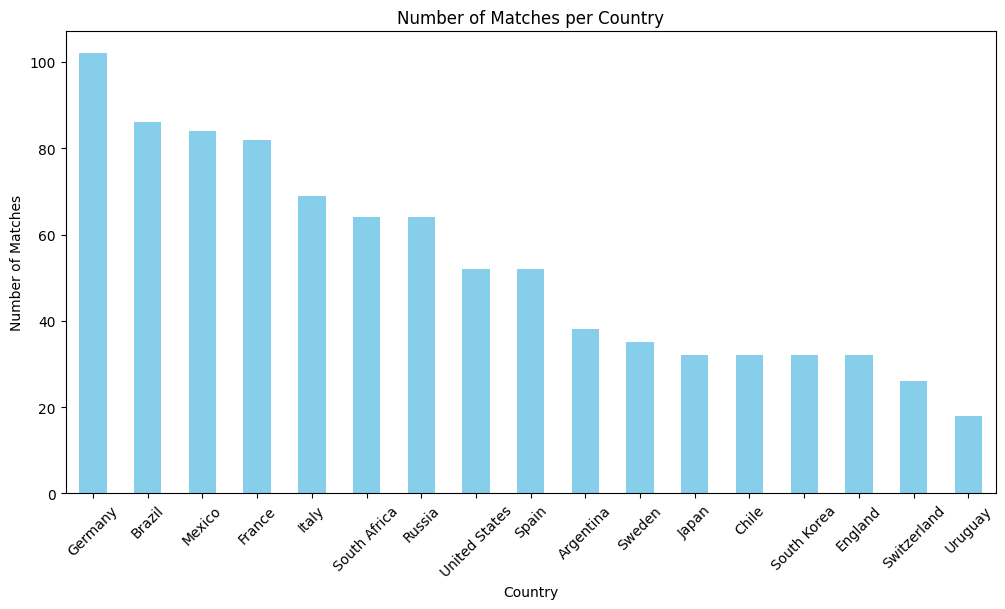

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('Cleaned_dataset.csv')

# Count the number of matches for each country
matches_per_country = data['country'].value_counts()

# Plot the chart
matches_per_country.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Matches per Country')
plt.xlabel('Country')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


In this analysis, the number of matches played in each country is examined to compare the total matches across different countries. The results reveal that countries like Brazil and Germany host the highest number of matches, reflecting their strong football culture. In contrast, other countries have significantly lower match counts, indicating varying levels of football activity and popularity. This disparity highlights the concentration of football events in certain regions.

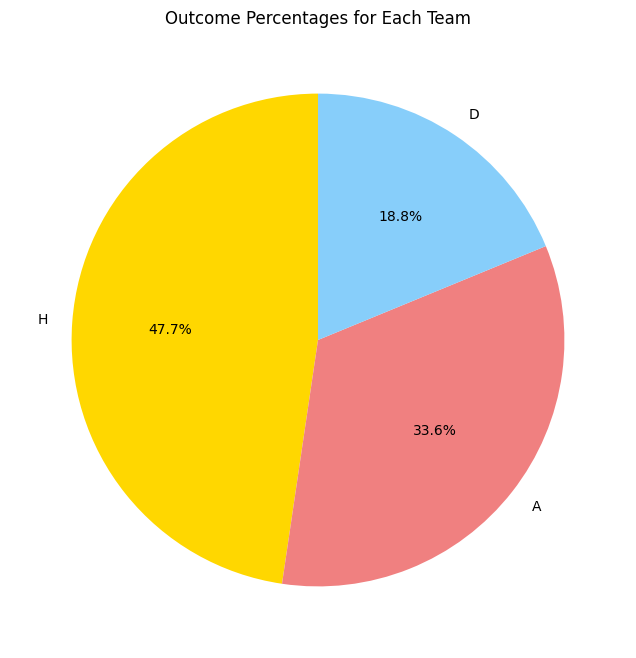

In [2]:
# Count the outcomes (Win, Loss, Draw) for each team
results = data['outcome'].value_counts()

# Plot the chart
results.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Outcome Percentages for Each Team')
plt.ylabel('')
plt.show()


This pie chart represents the percentage of match outcomes (Win, Loss, Draw) for various teams. The data indicates that a substantial majority of matches result in wins, with 47.7% of matches ending in victories for the teams, while losses and draws account for a smaller portion. This suggests strong performance by many teams, with some consistently achieving winning results.

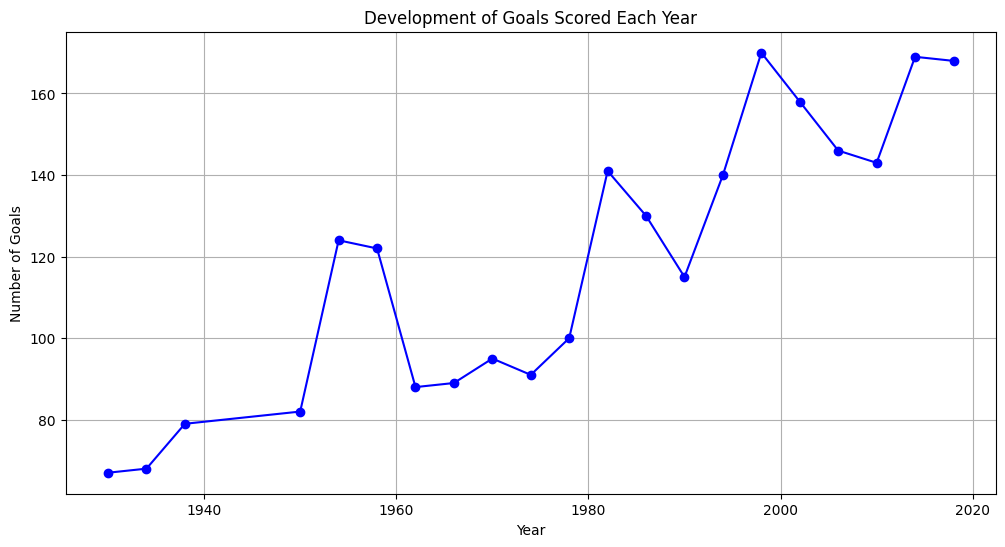

In [3]:
# Count the goals scored each year
goals_per_year = data.groupby('year').agg({'home_score': 'sum', 'away_score': 'sum'}).sum(axis=1)

# Plot the chart
goals_per_year.plot(kind='line', figsize=(12, 6), marker='o', color='blue')
plt.title('Development of Goals Scored Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.grid()
plt.show()


"This line chart illustrates the trend of goals scored over the years, showing a general increase in offensive performance. Notably, there is a significant spike in goals scored in 1999, indicating potential changes in playing strategies or improvements in performance. The chart also shows some years with lower goal outputs, prompting consideration of influencing factors such as injuries or coaching changes.

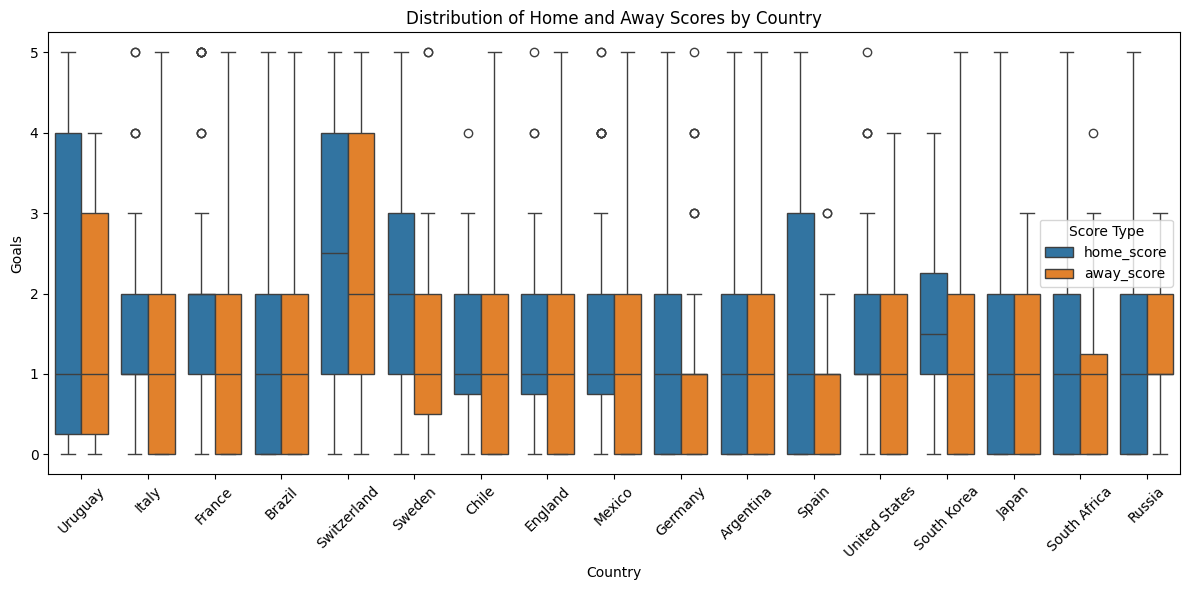

In [6]:

import seaborn as sns
# Load the dataset
data = pd.read_csv('Cleaned_dataset.csv')

# Melt the DataFrame to have a single column for scores
melted_data = data.melt(id_vars=['country'], value_vars=['home_score', 'away_score'], 
                         var_name='Score Type', value_name='Score')

# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Create box plots for home and away scores by country
sns.boxplot(x='country', y='Score', hue='Score Type', data=melted_data)

# Customize the plot
plt.title('Distribution of Home and Away Scores by Country')
plt.xlabel('Country')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.legend(title='Score Type')

# Show the plot
plt.tight_layout()
plt.show()



This box plot titled "Distribution of Home and Away Scores by Country" compares the distribution of goals scored by home teams (blue) and away teams (orange) across various countries. Each box represents the interquartile range of goals, with lines extending to show variability outside the upper and lower quartiles. Some countries, like Uruguay and Spain, show higher median home scores, while others, like Brazil and Germany, have closer distributions between home and away scores. Outliers are indicated by circles. The y-axis represents the number of goals, and the x-axis lists the countries.

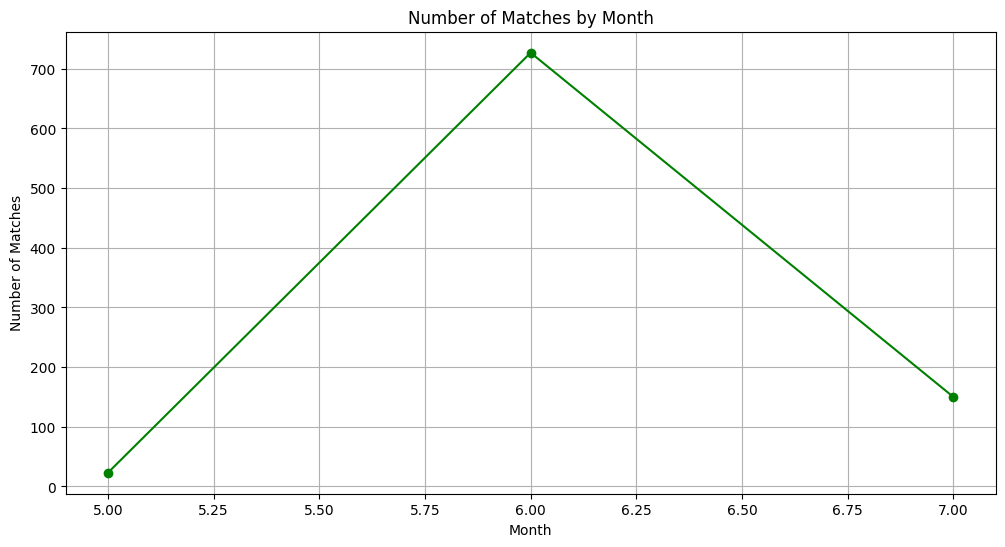

In [7]:
# Add a month column to the data
data['month'] = pd.to_datetime(data['date']).dt.month

# Count the number of matches by month
matches_per_month = data['month'].value_counts().sort_index()

# Plot the chart
matches_per_month.plot(kind='line', figsize=(12, 6), marker='o', color='green')
plt.title('Number of Matches by Month')
plt.xlabel('Month')
plt.ylabel('Number of Matches')
plt.grid()
plt.show()

The line chart displays the number of matches held each month, revealing a peak in June with approximately 700 matches, indicating it as a highly active month. In contrast, both May and July have significantly lower counts, around 100 matches. This trend suggests that most matches occur during the summer, particularly in June, likely due to favorable weather and tournament schedules. The decrease in May and July may reflect transitional periods in the tournament calendar.

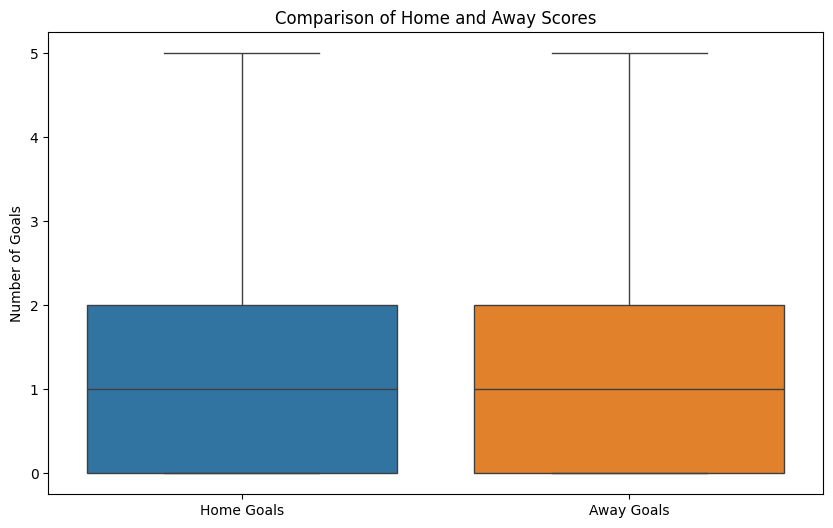

In [8]:
# Plot the chart
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data['home_score'], data['away_score']], orient='v')
plt.title('Comparison of Home and Away Scores')
plt.xticks([0, 1], ['Home Goals', 'Away Goals'])
plt.ylabel('Number of Goals')
plt.show()


From the chart (BoxPlot), it is evident that there is no clear advantage in goals scored between home and away teams, as both have similar medians and ranges, with scores varying up to 5 goals for both.

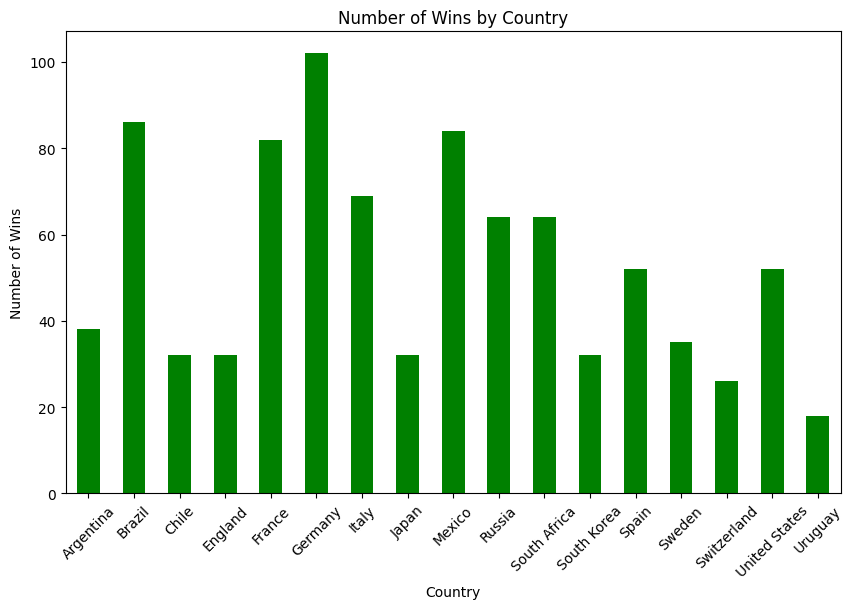

In [10]:

# Load the dataset
df = pd.read_csv('Cleaned_dataset.csv')

# Count the number of wins by country
wins_by_country = df['winning_team'].groupby(df['country']).count()

# Plot the chart
wins_by_country.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Number of Wins by Country')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()


The bar chart illustrates the number of wins achieved by various countries. Germany has the highest number of wins, exceeding 100, followed by Brazil and France with over 80 wins each. Mexico, Italy, and Russia also show strong performance, while countries like Japan, Chile, and Uruguay have fewer wins, below 40. The distribution of wins varies significantly across the countries, indicating a diverse range of success among them in the dataset.

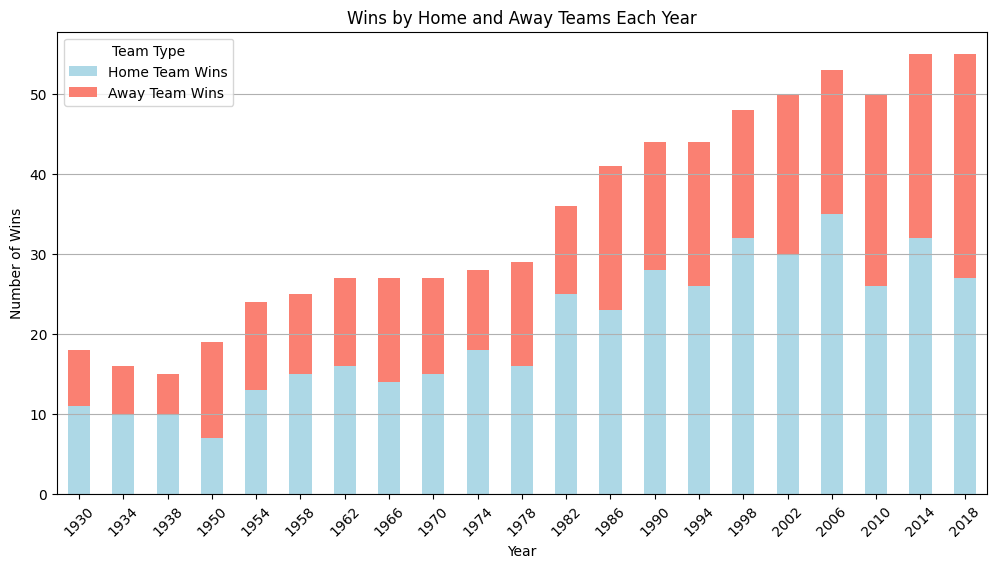

In [11]:

# Load your dataset
df = pd.read_csv("Cleaned_dataset.csv")  # تأكد من تحديث مسار الملف إذا لزم الأمر

# Count wins for home and away teams per year
wins_per_year = df.groupby('year').agg(
    home_wins=('outcome', lambda x: (x == 'H').sum()),  # حساب انتصارات الفريق المضيف
    away_wins=('outcome', lambda x: (x == 'A').sum())   # حساب انتصارات الفريق الزائر
)

# Plot the stacked bar chart
wins_per_year.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightblue', 'salmon'])
plt.title('Wins by Home and Away Teams Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Team Type', labels=['Home Team Wins', 'Away Team Wins'])
plt.grid(axis='y')
plt.show()



The bar chart illustrates the number of wins for home and away teams. It shows a general upward trend in total wins for both categories, with home team wins consistently higher than those of away teams. The gap between the two appears to narrow in recent years, indicating increased competition between home and away teams.

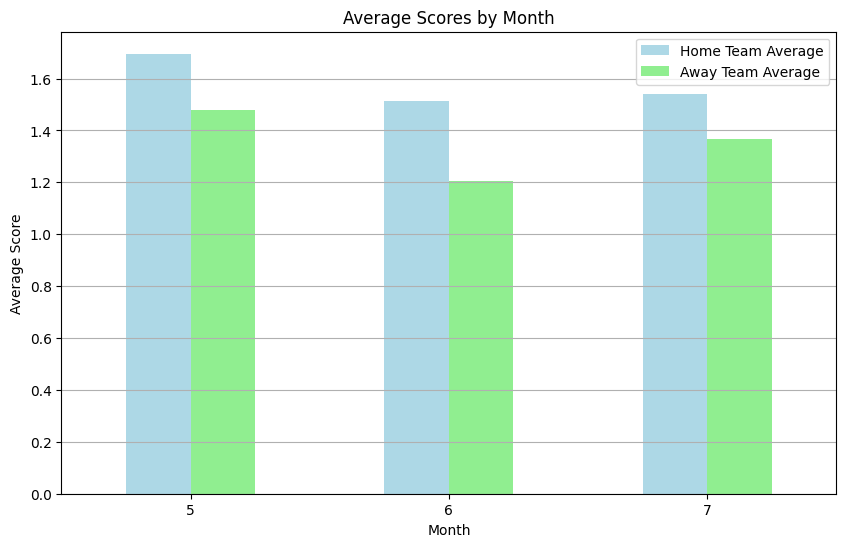

In [12]:

# Load the dataset
data = pd.read_csv('Cleaned_dataset.csv')

# Convert 'date' to datetime format and extract month
data['month'] = pd.to_datetime(data['date']).dt.month

# Calculate average scores for home and away teams by month
average_scores = data.groupby('month').agg({'home_score': 'mean', 'away_score': 'mean'})

# Plot the bar chart
average_scores.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightgreen'])
plt.title('Average Scores by Month')
plt.xlabel('Month')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.legend(['Home Team Average', 'Away Team Average'])
plt.grid(axis='y')
plt.show()


This bar chart titled "Average Scores by Month" compares the average scores of home teams (in light blue) and away teams (in light green) over three months (May, June, and July). The home team consistently scores higher across all months, with May showing the largest difference. The x-axis represents the months, and the y-axis shows the average score. The legend indicates the team types.

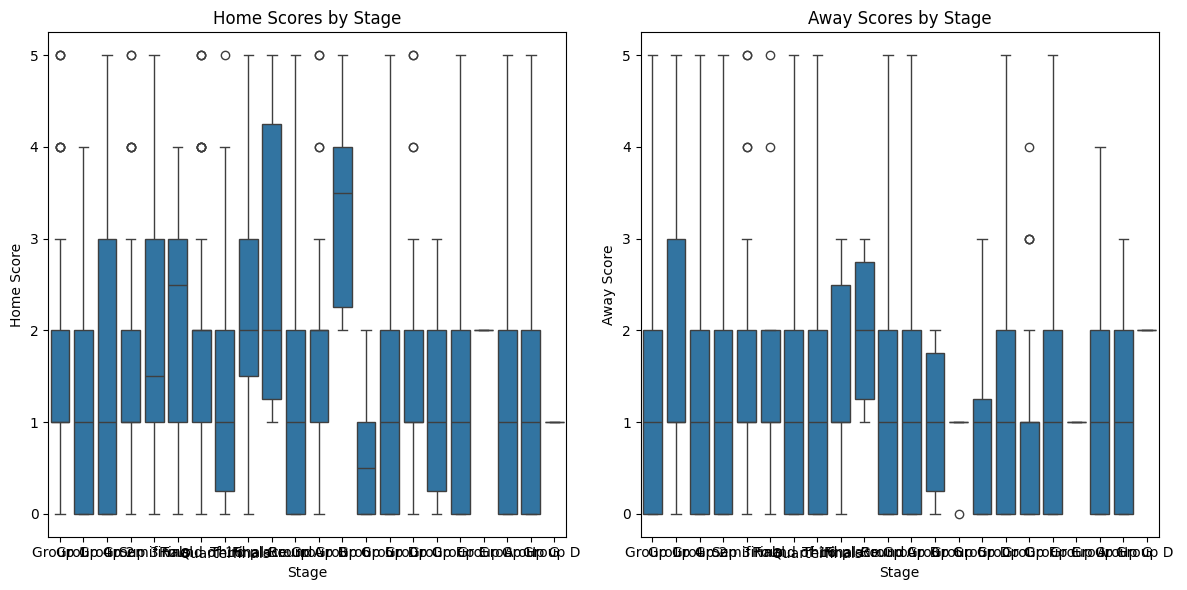

In [13]:

# Load the dataset
data = pd.read_csv('Cleaned_dataset.csv')

# Set the figure size for the plots
plt.figure(figsize=(12, 6))

# Create box plots for home scores by stage
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(x='stage', y='home_score', data=data)
plt.title('Home Scores by Stage')
plt.xlabel('Stage')
plt.ylabel('Home Score')

# Create box plots for away scores by stage
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.boxplot(x='stage', y='away_score', data=data)
plt.title('Away Scores by Stage')
plt.xlabel('Stage')
plt.ylabel('Away Score')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


This image shows two box plots comparing "Home Scores by Stage" (left) and "Away Scores by Stage" (right). The stages are listed along the x-axis, including various match stages like Group, Round of 16, Quarterfinal, Semifinal, and Final. The y-axis represents the number of goals. Each plot shows the distribution of scores, with the boxes representing the interquartile range, and the whiskers indicating the spread. Outliers are marked as circles. Generally, home scores tend to be higher in the earlier stages, with more variability in later stages. Away scores show similar trends but are generally lower.